# Reading a remote file using OPeNDAP

Now we will read a remote file using the [OPeNDAP protocol](http://www.opendap.org/). 

The advantage is that the file has not to be downloaded on your computer, while you can access the variables you want using it as it were on your computer. Furthermore, if the file is automatically updated on the remote server, you can run the same script without having to bother downloading it everytime it is updaded.

We first import the modules needed to load and plot the data. 

In [18]:
%matplotlib inline
import netCDF4
import matplotlib.pyplot as plt
import matplotlib as mpl

We use the same data as the previous example.<br/>
To get the file name, browse the directories in the thredds data server until you find the file you want (http://thredds.socib.es/thredds/dodsC/mooring/tide_gauge/station_santantoni-scb_wlog001/L1/2016/dep0001_station-santantoni_scb-wlog001_L1_2016-01.nc.html). Then copy the field called **Data URL**.

In [11]:
dataurl = "http://thredds.socib.es/thredds/dodsC/mooring/tide_gauge/station_santantoni-scb_wlog001/L1/2016/dep0001_station-santantoni_scb-wlog001_L1_2016-01.nc"

## Read the file

The method is exactly the same as the previous example, except the file has not been downloaded on your machine. In the present case, the file is updated several times a day, meaning that running the same code at different time of the day could produce different results, as more data will be included.

To be sure the file is closed, we will use the [context manager](https://en.wikibooks.org/wiki/Python_Programming/Context_Managers) *with ... as ...*.

In [12]:
with netCDF4.Dataset(dataurl) as ds:
    sealevel_values = ds.variables['SLEV'][:]
    time_values = ds.variables['time'][:]
    sealevel_units = ds.variables['SLEV'].units
    time_units = ds.variables['time'].units

## A simple plot 

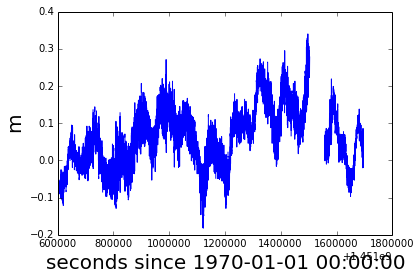

In [13]:
plt.plot(time_values, sealevel_values)
plt.xlabel(time_units, fontsize=20)
plt.ylabel(sealevel_units, fontsize=20)

**Problems:**
* With the time units in seconds since 1st January 1970, it is not easy to see which period the curve represents.
* The xticklabels and the xlabel overlay.

The solution is to change the time format using the *units* attribute of the variable and the [*num2date*](http://netcdf4-python.googlecode.com/svn/trunk/docs/netcdftime.netcdftime-module.html#num2date) function.

In [14]:
time2 = netCDF4.num2date(time_values, time_units)

Let's see how it looks like after the conversion:

In [15]:
print time2[0:5]

[datetime.datetime(2016, 1, 1, 0, 0) datetime.datetime(2016, 1, 1, 0, 1)
 datetime.datetime(2016, 1, 1, 0, 2) datetime.datetime(2016, 1, 1, 0, 3)
 datetime.datetime(2016, 1, 1, 0, 4)]


We try the plot again:

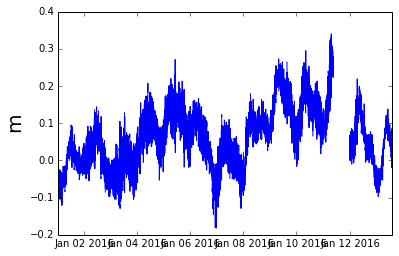

In [16]:
plt.plot(time2, sealevel_values)
plt.ylabel(sealevel_units, fontsize=20)
plt.show()

Now that's clearer. Now let's improve the figure.

## Improved plot

With some commands the previous plots can be improved:
* The font size of all the texts and labels is set to 20 (pts),
* The font is set to *Times New Roman*.
* The figure size is increased,
* The year labels are rotated 45º.

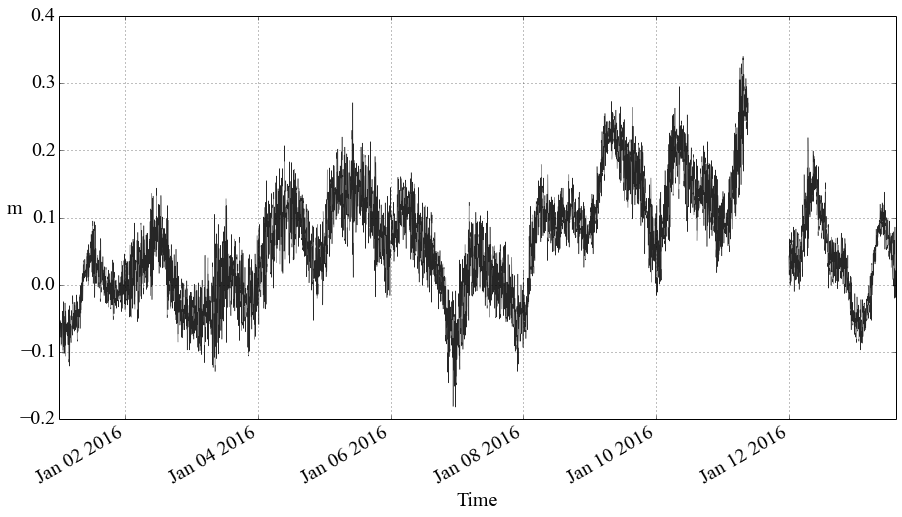

In [29]:
mpl.rcParams.update({'font.size': 20, 'font.family': 'Times New Roman'})

fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111)
plt.plot(time2, sealevel_values, linewidth=0.5, color='0.15')
plt.ylabel(sealevel_units, rotation=0)
plt.xlabel('Time')
fig.autofmt_xdate()
plt.grid()
plt.show()